In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%cd "C:\Users\gmcclelland\Desktop\Misc School Stuff\repo\CISC451\project\data"
%matplotlib inline

C:\Users\gmcclelland\Desktop\Misc School Stuff\repo\CISC451\project\data


## Simple EDA of Player-Level Data
With event-level data already explored, the next layer of abstraction to explore is player-level information contained in the file 'skaterstats_2017-2018_2018-2019.csv', which contains player-level aggregate information by unique game_id 

In [2]:
# Once again, loading selected relevant datasets
plays = pd.read_csv('plays_2017-2018_2018-2019.csv')
# games = pd.read_csv('games_2017-2018_2018-2019.csv')
skater_stats = pd.read_csv('skaterstats_2017-2018_2018-2019.csv')
# team_stats = pd.read_csv('teamstats_2017-2018_2018-2019.csv')
s_info = pd.read_csv('player_info.csv') # static library of players
t_info = pd.read_csv('team_info.csv') # static library of teams

### Simple Metadata
 Understanding what there is to work with at the player-level

In [3]:
s_info.head() # number of players in the library, s_info.shape = 2409 players in file

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [4]:
skater_stats.head() # here we see that we can merge on player_id in the info table to get more metadata on each player (i.e. name), so let's do that:
skater_stats= pd.merge(skater_stats,s_info,on='player_id')
skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,2017030241,8468542,28,601,0,0,0,1,0,0,...,529,60,12,Paul,Martin,USA,Minneapolis,D,1981-03-05,/api/v1/people/8468542
1,2017030242,8468542,28,638,0,0,1,1,0,0,...,638,0,0,Paul,Martin,USA,Minneapolis,D,1981-03-05,/api/v1/people/8468542
2,2017030243,8468542,28,935,0,0,0,3,0,0,...,888,47,0,Paul,Martin,USA,Minneapolis,D,1981-03-05,/api/v1/people/8468542
3,2017030181,8468542,28,947,0,0,1,0,0,0,...,908,39,0,Paul,Martin,USA,Minneapolis,D,1981-03-05,/api/v1/people/8468542
4,2017030182,8468542,28,995,0,0,1,1,0,0,...,995,0,0,Paul,Martin,USA,Minneapolis,D,1981-03-05,/api/v1/people/8468542


In [5]:
# Next, we can also introduce team-level info by joining on 'team_id' to get team-level metadata
skater_stats=pd.merge(skater_stats,t_info,on='team_id')

In [6]:
skater_stats.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_x', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link_y'],
      dtype='object')

Above, we can see that the player-level stats contain aggregates of individual events on a game-by-game basis. This dataset also includes a breakdown of certain aggregates on special teams (powerPlay and shortHanded metrics)

- This is particularly useful moving forward because most of this data is numeric

In [7]:
skater_stats.describe()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,franchiseId
count,9.766700e+04,9.766700e+04,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,...,97667.00000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000,97667.000000
mean,2.017522e+09,8.475542e+06,19.069430,991.480992,0.275671,0.163894,1.759776,1.257262,0.033379,0.063624,...,0.41920,0.521343,0.004761,0.004833,0.811021,-0.009225,843.060870,65.766881,82.653240,22.531418
std,5.000178e+05,2.856850e+03,13.963456,282.648528,0.549999,0.421451,1.558404,1.428104,0.185954,0.263567,...,0.69901,0.803843,0.069576,0.069498,1.095014,1.169114,233.480569,81.416277,99.864139,9.940990
min,2.017020e+09,8.448208e+06,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,-6.000000,9.000000,0.000000,0.000000,1.000000
25%,2.017021e+09,8.474150e+06,8.000000,799.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,685.000000,0.000000,0.000000,15.000000
50%,2.018020e+09,8.476207e+06,17.000000,991.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,838.000000,35.000000,46.000000,23.000000
75%,2.018021e+09,8.477492e+06,25.000000,1182.500000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,...,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,998.000000,111.000000,141.000000,31.000000
max,2.018030e+09,8.481486e+06,54.000000,2698.000000,5.000000,5.000000,13.000000,15.000000,3.000000,4.000000,...,8.00000,8.000000,2.000000,2.000000,11.000000,6.000000,2234.000000,723.000000,714.000000,38.000000


### Simple Metrics 
- From this dataset, which has been made more complete, simple but useful metrics can be created to perform analyses at both player and team-level
- Additionally, we can dig deeper to the individual events that make up these aggregates by joining (merging) on the 'game_id' column in the previously explored event-driven shot data, which presents some interesting opportunities moving forward


In [8]:
# Bearing in mind that we could drill-down to the individual game events as previously discussed, we can also aggregate to a higher level, and get totals grouping by players for the entire dataset
player_totals=skater_stats[['player_id','firstName','lastName','primaryPosition','timeOnIce', 'assists', 'goals','shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce']]
player_totals = player_totals.groupby(['player_id','firstName','lastName','primaryPosition']).agg('sum')
player_totals = player_totals.sort_values(by='timeOnIce',ascending=False)
player_totals.head()

,,,,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
player_id,firstName,lastName,primaryPosition,,,,,,,,,,,,,,,,,,,
8470613,Brent,Burns,D,297316,137,36,721,240,14,49,92,0,1,178,274,1,5,306,-5,234632,21616,41068
8474590,John,Carlson,D,290171,130,33,525,151,11,70,80,0,1,145,220,0,0,367,32,216126,28794,45251
8474563,Drew,Doughty,D,267963,87,18,365,301,10,34,98,0,1,40,188,1,1,258,-11,211133,26194,30636
8475200,Dmitry,Orlov,D,264910,57,15,284,320,0,6,63,0,0,128,157,0,0,266,16,234330,18907,11673
8474565,Alex,Pietrangelo,D,263184,83,31,461,134,6,26,56,0,1,130,111,0,2,351,15,210549,22403,30232


In [9]:
# For a simple player-level metric, let's find the players with the best ratio of takeaways to giveaways, which is particularly useful when looking at concepts such as game flow
takeaway_leaders = player_totals[['takeaways','giveaways']]
takeaway_leaders['t_g_ratio']=takeaway_leaders['takeaways']/takeaway_leaders['giveaways']
takeaway_leaders = takeaway_leaders.replace(np.inf,np.nan).dropna()
takeaway_leaders = takeaway_leaders.sort_values(by='t_g_ratio',ascending=False)
takeaway_leaders.head(30)

,,,,takeaways,giveaways,t_g_ratio
player_id,firstName,lastName,primaryPosition,,,
8476955,Taylor,Leier,LW,11,1,11.000000
8477366,Luke,Johnson,C,6,1,6.000000
8478541,Markus,Hannikainen,LW,26,5,5.200000
8479580,Dylan,Gambrell,C,5,1,5.000000
8479315,Joey,Anderson,RW,12,3,4.000000
8478365,Danick,Martel,LW,4,1,4.000000
8477591,Josh,Jooris,RW,12,3,4.000000
8478462,Nicolas,Roy,C,4,1,4.000000
8478106,Dylan,Sikura,RW,26,7,3.714286


<AxesSubplot:title={'center':'Powerplay Goals by Team per Game (over the 2017-2018 and 2018-2019 Seasons'}, xlabel='abbreviation'>

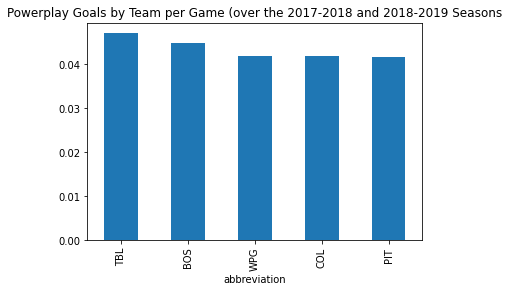

In [10]:
# To take things a step further, aggregates can be created at the team-level as a total of a column by all players belonging to one team

# Let's use powerplay goals as an example
team_ppg=skater_stats.groupby(['abbreviation'])['powerPlayGoals'].agg('mean').nlargest(5)

team_ppg.sort_values(ascending=False).plot(kind='bar', title='Powerplay Goals by Team per Game (over the 2017-2018 and 2018-2019 Seasons')

The different levels of abstraction that player-level metrics can be used for 